In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import tqdm

In [3]:
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=data_transforms)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=data_transforms)

In [5]:
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

Training samples: 50000
Testing samples: 10000


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
epochs = 5
train_losses = []
test_losses = []

def train():
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

def test():
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return running_loss / len(test_loader), accuracy

In [9]:
for epoch in range(epochs):
    train_loss = train()
    test_loss, test_acc = test()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch 1/5, Train Loss: 1.2749, Test Loss: 0.9935, Test Accuracy: 65.85%
Epoch 2/5, Train Loss: 0.8952, Test Loss: 0.8710, Test Accuracy: 69.66%
Epoch 3/5, Train Loss: 0.7396, Test Loss: 0.8279, Test Accuracy: 71.50%
Epoch 4/5, Train Loss: 0.6242, Test Loss: 0.8505, Test Accuracy: 71.42%
Epoch 5/5, Train Loss: 0.5216, Test Loss: 0.8680, Test Accuracy: 71.82%


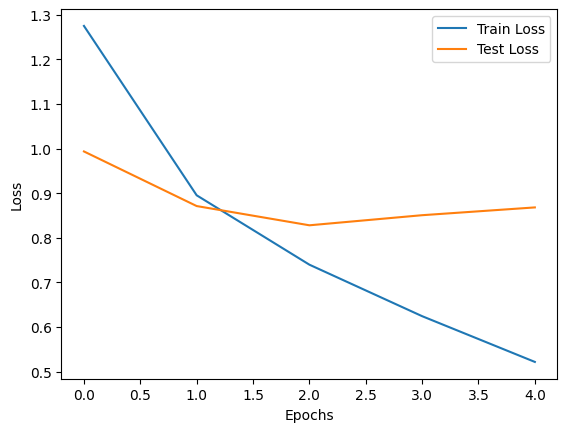

In [10]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
torch.save(model.state_dict(), 'cifar10_cnn.pth')